<a href="https://colab.research.google.com/github/mlvlab/KCCV_2023_CPC_Tutorial/blob/main/KCCV2023_CPC_HOI_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPC for Transformers in Human Object Interaction Detection
[Paper link](https://openaccess.thecvf.com/content/CVPR2022/papers/Park_Consistency_Learning_via_Decoding_Path_Augmentation_for_Transformers_in_Human_CVPR_2022_paper.pdf)
[Code link](https://github.com/mlvlab/CPC_HOI/blob/main/README.md)
![cpc.gif](https://drive.google.com/uc?id=1D3x2wPAMqsq4Wp3lBD2L1orwtBnILI2l)

## 실습 내용


1.   Cross-Path Consistency 코드 리뷰 및 실습
2.   Visualization 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb
!pip install mmcv
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.9 MB/s 
     |████████████████████████████████| 157 kB 65.3 MB/s 
     |████████████████████████████████| 181 kB 61.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 157 kB 69.5 MB/s 
     |████████████████████████████████| 157 kB 75.0 MB/s 
     |████████████████████████████████| 156 kB 72.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=7b066dcbe55f14696c22e31bf95bd5967d88c6776a4f7748bc55d0c4fff204c7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 9.6 MB/s 
     |████████████████████████████████| 190 kB 14.5

In [ ]:
%cd drive/MyDrive/
!git clone https://github.com/jihwanp/CPC_HOTR.git

/content/drive/MyDrive
/content/drive/MyDrive/CPC_HOTR


In [ ]:
import gdown
import os
if not os.path.exists('./checkpoints/vcoco/'):
    os.makedirs('./checkpoints/vcoco/')
# v-coco
url_data= 'https://drive.google.com/drive/folders/11qPvV5oeqnKX4oxCOJBEaBjViK0vZkJr'
url_checkpoints= 'https://drive.google.com/drive/folders/1ZKWe7If_2hpboxBYY_xd93RiJY15OfB7'

gdown.download_folder(url_checkpoints)
gdown.download_folder(url_data)

# if not os.path.exists('./checkpoints/hico-det/'):
#     os.makedirs('./checkpoints/hico-det/')
# # hico-det
# !wget -nc https://arena.kakaocdn.net/brainrepo/hotr/hico_ft_q16.pth -P ./checkpoints/hico-det/

Retrieving folder list


Retrieving folder 1Stfv67dDpq4p7OLvnrNRWHkwUrE1FBLL vcoco
Processing file 1NSSyr8rGl7elWUhO1qY8aSPHjMF9CN4b checkpoint.pth
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1NSSyr8rGl7elWUhO1qY8aSPHjMF9CN4b
To: /content/drive/MyDrive/CPC_HOTR/checkpoints/vcoco/checkpoint.pth
100%|██████████| 301M/301M [00:01<00:00, 201MB/s]
Download completed
Retrieving folder list


Retrieving folder 12bxwrxJgyUETFOB46QsJMQ8B0d0UwyZy data
Retrieving folder 13OKsHQ3mH4MAxSkznlMSDkviunn2UaAi vcoco
Processing file 15BQdQ1gEMTeNfnQmuXUDD1SExUnYbI9u vcoco_test.json
Processing file 158uphNPyKd4dP34j0ERkZ0DczYGHJi8O vcoco_train.json
Processing file 1588T2SLeGza5ePvZchblOw6WDInxHHpY vcoco_trainval.json
Processing file 14xdgtoQIQR4UdGaxG-fWW9A_sBjIVgAR vcoco_val.json
Processing file 14RaTxkpT8vOHJmo4rhxiPQoEzV6TJoqd instances_vcoco_all_2014.json
Processing file 13Npw3OOymbtDy0A9LNWJv4WGDPPJthZD vcoco_test.ids
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=15BQdQ1gEMTeNfnQmuXUDD1SExUnYbI9u
To: /content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_test.json
100%|██████████| 6.19M/6.19M [00:00<00:00, 199MB/s]
Downloading...
From: https://drive.google.com/uc?id=158uphNPyKd4dP34j0ERkZ0DczYGHJi8O
To: /content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_train.json
100%|██████████| 3.14M/3.14M [00:00<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1588T2SLeGza5ePvZchblOw6WDInxHHpY
To: /content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_trainval.json
100%|██████████| 6.72M/6.72M [00:00<00:00, 196MB/s]
Downloading...
From: https://drive.google.com/uc?id=14xdgtoQIQR4UdGaxG-fWW9A_sBjIVgAR
To: /content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_val.json
100%|██████████| 3.59M/3.59M [00:00<00:00, 192MB/s]
Downloading...
From: https://drive.google.com/uc?id=14RaTxkpT8vOHJmo4rhxiPQoEzV6TJoqd
To: /content/dri

['/content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_test.json',
 '/content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_train.json',
 '/content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_trainval.json',
 '/content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco/vcoco_val.json',
 '/content/drive/MyDrive/CPC_HOTR/v-coco/data/instances_vcoco_all_2014.json',
 '/content/drive/MyDrive/CPC_HOTR/v-coco/data/vcoco_test.ids']

## Cross-path consistency 코드리뷰

<img src="https://drive.google.com/uc?id=1dPByxW-htFJqMNyPyvNh2aB4JitTBuM4"  width="600" height="380"/>

Decoding Path Augmentation

---

$X$: feature map extracted from CNN + Transformer Encoder

Decoder parameters are shared across decoding stages.

Main Path $\mathcal{P}_1$ : $e_{1,1}=f(e_{0,0}+q_{1,1},X)$

Each decoding stage of path $\mathcal{P}_k (k\geq 2)$ can be written as:


\begin{equation}
\begin{split}
    e_{{k,1}} &= f(e_{k,0}+ q_{k,1}, \ X), \\
    e_{{k,2}} &= f(e_{k,1} + q_{k,2}, \ X),
\end{split}
\end{equation} 







In [4]:
# ------------------------------------------------------------------------
# HOTR official code : hotr/models/hotr.py
# Copyright (c) Kakao Brain, Inc. and its affiliates. All Rights Reserved
# ------------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
import time
import datetime

from hotr.util.misc import (NestedTensor, nested_tensor_from_tensor_list)

from hotr.models.backbone import build_backbone
from hotr.models.detr_matcher import build_matcher
from hotr.models.hotr_matcher import build_hoi_matcher
from hotr.models.transformer import build_transformer, build_hoi_transformer
from hotr.models.criterion import SetCriterion
from hotr.models.post_process import PostProcess
from hotr.models.feed_forward import MLP
from hotr.models.hotr import HOTR as hotr
from hotr.models.detr import DETR

class HOTR(nn.Module):
    def __init__(self, detr,
                 num_hoi_queries,
                 num_actions,
                 interaction_transformer,
                 augpath_name,
                 share_dec_param,
                 stop_grad_stage,
                 freeze_detr,
                 share_enc,
                 pretrained_dec,
                 temperature,
                 hoi_aux_loss,
                 return_obj_class=None):
        super().__init__()

        # * Instance Transformer ---------------
        self.detr = detr
        if freeze_detr:
            # if this flag is given, freeze the object detection related parameters of DETR
            for p in self.parameters():
                p.requires_grad_(False)
        hidden_dim = detr.transformer.d_model
        # --------------------------------------

        # * Interaction Transformer -----------------------------------------
        self.num_queries = num_hoi_queries
        self.query_embed = nn.Embedding(self.num_queries, hidden_dim)
        self.H_Pointer_embed   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
        self.O_Pointer_embed   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
        self.action_embed = nn.Linear(hidden_dim, num_actions+1)
        # --------------------------------------------------------------------


        # * HICO-DET FFN heads ---------------------------------------------
        self.return_obj_class = (return_obj_class is not None)
        if return_obj_class: self._valid_obj_ids = return_obj_class + [return_obj_class[-1]+1]
        # ------------------------------------------------------------------
        # * Transformer Options ---------------------------------------------
        self.interaction_transformer = interaction_transformer

        if share_enc: # share encoder
            self.interaction_transformer.encoder = detr.transformer.encoder

        if pretrained_dec: # free variables for interaction decoder
            self.interaction_transformer.decoder = copy.deepcopy(detr.transformer.decoder)
            for p in self.interaction_transformer.decoder.parameters():
                p.requires_grad_(True)
        # ---------------------------------------------------------------------
        #Augmented paths

        self.aug_paths = augpath_name

        if 'p2' in augpath_name:
            if not share_dec_param:
                self.xtoHO_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
                self.HOtoI_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
            else:
                self.xtoHO_interaction_decoder = self.interaction_transformer.decoder
                self.HOtoI_interaction_decoder = self.interaction_transformer.decoder

            self.query_embed_HOtoI = nn.Embedding(self.num_queries, hidden_dim)
            self.query_embed_HOtoI2 = nn.Embedding(self.num_queries, hidden_dim)
            self.H_Pointer_embed_HOtoI   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.O_Pointer_embed_HOtoI   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.action_embed_HOtoI = nn.Linear(hidden_dim, num_actions+1)

        if 'p3' in augpath_name:
            if not share_dec_param:
                self.xtoHI_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
                self.HItoO_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
            else:
                self.xtoHI_interaction_decoder = self.interaction_transformer.decoder
                self.HItoO_interaction_decoder = self.interaction_transformer.decoder

            self.query_embed_HItoO = nn.Embedding(self.num_queries, hidden_dim)
            self.query_embed_HItoO2 = nn.Embedding(self.num_queries, hidden_dim)
            self.H_Pointer_embed_HItoO   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.O_Pointer_embed_HItoO   = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.action_embed_HItoO = nn.Linear(hidden_dim, num_actions+1)

        if 'p4' in augpath_name:
            if not share_dec_param:
                self.xtoOI_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
                self.OItoH_interaction_decoder = copy.deepcopy(self.interaction_transformer.decoder)
            else:
                self.xtoOI_interaction_decoder = self.interaction_transformer.decoder
                self.OItoH_interaction_decoder = self.interaction_transformer.decoder

            self.query_embed_OItoH = nn.Embedding(self.num_queries, hidden_dim)
            self.query_embed_OItoH2 = nn.Embedding(self.num_queries, hidden_dim)
            self.H_Pointer_embed_OItoH  = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.O_Pointer_embed_OItoH  = MLP(hidden_dim, hidden_dim, hidden_dim, 3)
            self.action_embed_OItoH = nn.Linear(hidden_dim, num_actions+1)

        self.stop_grad_stage = stop_grad_stage

        # * Loss Options -------------------
        self.tau = temperature
        self.hoi_aux_loss = hoi_aux_loss
        # ----------------------------------

    def forward(self, samples: NestedTensor):
        if isinstance(samples, (list, torch.Tensor)):
            samples = nested_tensor_from_tensor_list(samples)
        
        # >>>>>>>>>>>>  BACKBONE LAYERS  <<<<<<<<<<<<<<<
        features, pos = self.detr.backbone(samples)
        bs = features[-1].tensors.shape[0]
        src, mask = features[-1].decompose()
        assert mask is not None
        # ----------------------------------------------

        # >>>>>>>>>>>> OBJECT DETECTION LAYERS <<<<<<<<<<
        start_time = time.time()
        hs, memory = self.detr.transformer(self.detr.input_proj(src), mask, self.detr.query_embed.weight, pos[-1])
        inst_repr = F.normalize(hs[-1], p=2, dim=2) # instance representations

        # Prediction Heads for Object Detection
        outputs_class = self.detr.class_embed(hs)
        outputs_coord = self.detr.bbox_embed(hs).sigmoid()
        object_detection_time = time.time() - start_time
        # -----------------------------------------------

        # >>>>>>>>>>>> HOI DETECTION LAYERS <<<<<<<<<<<<<<<
        start_time = time.time()
        assert hasattr(self, 'interaction_transformer'), "Missing Interaction Transformer."
        H_Pointer_reprs_bag,O_Pointer_reprs_bag,outputs_action=[],[],[]
        # main path P1
        interaction_hs= self.interaction_transformer(self.detr.input_proj(src), mask, self.query_embed.weight, pos[-1])[0] # interaction representations
        H_Pointer_reprs_bag.append(F.normalize(self.H_Pointer_embed(interaction_hs), p=2, dim=-1))
        O_Pointer_reprs_bag.append(F.normalize(self.O_Pointer_embed(interaction_hs), p=2, dim=-1))
        outputs_action.append(self.action_embed(interaction_hs))
        
        if len(self.aug_paths)!=0:
            pos_aug = pos[-1].flatten(2).permute(2, 0, 1)
            mask_aug = mask.flatten(1)
        
        # P2 (x->HO->I)
        if 'p2' in self.aug_paths:
            tgt_2 = torch.zeros_like(self.query_embed_HOtoI.weight.unsqueeze(1).repeat(1, bs, 1))
            hs_HOtoI = self.xtoHO_interaction_decoder(tgt_2,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_HOtoI.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            tgt_HOtoI = hs_HOtoI.transpose(1,2)[-1] if not self.stop_grad_stage else hs_HOtoI.clone().detach().transpose(1,2)[-1]
            hs2_HOtoI = self.HOtoI_interaction_decoder(tgt_HOtoI,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_HOtoI2.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            H_Pointer_reprs_bag.append(F.normalize(self.H_Pointer_embed_HOtoI(hs_HOtoI), p=2, dim=-1))
            O_Pointer_reprs_bag.append(F.normalize(self.O_Pointer_embed_HOtoI(hs_HOtoI), p=2, dim=-1))
            outputs_action.append(self.action_embed_HOtoI(hs2_HOtoI))
        # P3 (x->HI->O)
        if 'p3' in self.aug_paths:
            tgt_3 = torch.zeros_like(self.query_embed_HItoO.weight.unsqueeze(1).repeat(1, bs, 1))
            hs_HItoO = self.xtoHI_interaction_decoder(tgt_3,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_HItoO.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            tgt_HItoO = hs_HItoO.transpose(1,2)[-1] if not self.stop_grad_stage else hs_HItoO.clone().detach().transpose(1,2)[-1]
            hs2_HItoO = self.HItoO_interaction_decoder(tgt_HItoO,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_HItoO2.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            H_Pointer_reprs_bag.append(F.normalize(self.H_Pointer_embed_HItoO(hs_HItoO), p=2, dim=-1))
            O_Pointer_reprs_bag.append(F.normalize(self.O_Pointer_embed_HItoO(hs2_HItoO), p=2, dim=-1))
            outputs_action.append(self.action_embed_HItoO(hs_HItoO))
        # P4 (x->OI->H)
        if 'p4' in self.aug_paths:
            tgt_4 = torch.zeros_like(self.query_embed_OItoH.weight.unsqueeze(1).repeat(1, bs, 1))
            hs_OItoH = self.xtoOI_interaction_decoder(tgt_3,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_OItoH.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            tgt_OItoH = hs_OItoH.transpose(1,2)[-1] if not self.stop_grad_stage else hs_OItoH.clone().detach().transpose(1,2)[-1]
            hs2_OItoH = self.OItoH_interaction_decoder(tgt_OItoH,memory,memory_key_padding_mask=mask_aug, pos=pos_aug, query_pos=self.query_embed_OItoH2.weight.unsqueeze(1).repeat(1, bs, 1)).transpose(1,2)
            H_Pointer_reprs_bag.append(F.normalize(self.H_Pointer_embed_OItoH(hs2_OItoH), p=2, dim=-1))
            O_Pointer_reprs_bag.append(F.normalize(self.O_Pointer_embed_OItoH(hs_OItoH), p=2, dim=-1))
            outputs_action.append(self.action_embed_OItoH(hs_OItoH))

        inst_repr_all=inst_repr.transpose(1,2).repeat(1+len(self.aug_paths),1,1)

        H_Pointer_reprs_bag=torch.cat(H_Pointer_reprs_bag,1)
        O_Pointer_reprs_bag=torch.cat(O_Pointer_reprs_bag,1)
        
        outputs_hidx = [(torch.bmm(H_Pointer_repr, inst_repr_all)) / self.tau for H_Pointer_repr in H_Pointer_reprs_bag] #(dec_layer,(1+len(aug))*bs,dec_q,hidden_dim)
        outputs_oidx = [(torch.bmm(O_Pointer_repr, inst_repr_all)) / self.tau for O_Pointer_repr in O_Pointer_reprs_bag]

        outputs_action=torch.stack(outputs_action,dim=2) #(dec_layer,bs,1+#aug,dec_q,#action)
        
        # --------------------------------------------------
        hoi_detection_time = time.time() - start_time
        hoi_recognition_time = max(hoi_detection_time - object_detection_time, 0)
        # -------------------------------------------------------------------

        # [Target Classification]
        if self.return_obj_class:
            detr_logits = outputs_class[-1, ..., self._valid_obj_ids]
            o_indices = [output_oidx.max(-1)[-1].view(1+len(self.aug_paths),bs,self.num_queries).transpose(0,1) for output_oidx in outputs_oidx]
            obj_logit_stack = [torch.stack([detr_logits[batch_, o_idx, :] for batch_, o_idc in enumerate(o_indice) for o_idx in o_idc], 0) for o_indice in o_indices]
            outputs_obj_class = obj_logit_stack

        out = {
            "pred_logits": outputs_class[-1],
            "pred_boxes": outputs_coord[-1],
            "pred_hidx": outputs_hidx[-1],
            "pred_oidx": outputs_oidx[-1],
            "pred_actions": outputs_action[-1],
            "hoi_recognition_time": hoi_recognition_time,
        }

        if self.return_obj_class: out["pred_obj_logits"] = outputs_obj_class[-1]
        # import pdb;pdb.set_trace()
        if self.hoi_aux_loss: # auxiliary loss
            out['hoi_aux_outputs'] = \
                self._set_aux_loss_with_tgt(outputs_class, outputs_coord, outputs_hidx, outputs_oidx, outputs_action, outputs_obj_class) \
                if self.return_obj_class else \
                self._set_aux_loss(outputs_class, outputs_coord, outputs_hidx, outputs_oidx, outputs_action)

        return out

def build_model(args):
    device = torch.device(args.device)

    backbone = build_backbone(args)

    transformer = build_transformer(args)

    model = DETR(
        backbone,
        transformer,
        num_classes=args.num_classes,
        num_queries=args.num_queries,
        aux_loss=args.aux_loss,
    )

    matcher = build_matcher(args)
    weight_dict = {'loss_ce': 1, 'loss_bbox': args.bbox_loss_coef}
    weight_dict['loss_giou'] = args.giou_loss_coef

    # TODO this is a hack
    if args.aux_loss:
        aux_weight_dict = {}
        for i in range(args.dec_layers - 1):
            aux_weight_dict.update({k + f'_{i}': v for k, v in weight_dict.items()})
        weight_dict.update(aux_weight_dict)

    losses = ['labels', 'boxes', 'cardinality'] if args.frozen_weights is None else []
    if args.HOIDet:
        hoi_matcher = build_hoi_matcher(args)
        hoi_losses = []
        hoi_losses.append('pair_labels')
        hoi_losses.append('pair_actions')
        if args.dataset_file == 'hico-det': hoi_losses.append('pair_targets')
        
        hoi_weight_dict={}
        hoi_weight_dict['loss_hidx'] = args.hoi_idx_loss_coef
        hoi_weight_dict['loss_oidx'] = args.hoi_idx_loss_coef
        hoi_weight_dict['loss_h_consistency'] = args.hoi_idx_consistency_loss_coef
        hoi_weight_dict['loss_o_consistency'] = args.hoi_idx_consistency_loss_coef
        hoi_weight_dict['loss_act'] = args.hoi_act_loss_coef
        hoi_weight_dict['loss_act_consistency'] = args.hoi_act_consistency_loss_coef
        if args.dataset_file == 'hico-det': 
            hoi_weight_dict['loss_tgt'] = args.hoi_tgt_loss_coef
            hoi_weight_dict['loss_tgt_consistency'] = args.hoi_tgt_consistency_loss_coef
        if args.hoi_aux_loss:
            hoi_aux_weight_dict = {}
            for i in range(args.hoi_dec_layers):
                hoi_aux_weight_dict.update({k + f'_{i}': v for k, v in hoi_weight_dict.items()})
            hoi_weight_dict.update(hoi_aux_weight_dict)

        criterion = SetCriterion(args.num_classes, matcher=matcher, weight_dict=hoi_weight_dict,
                                 eos_coef=args.eos_coef, losses=losses, num_actions=args.num_actions,
                                 HOI_losses=hoi_losses, HOI_matcher=hoi_matcher, args=args)

        interaction_transformer = build_hoi_transformer(args) # if (args.share_enc and args.pretrained_dec) else None

        kwargs = {}
        if args.dataset_file == 'hico-det': kwargs['return_obj_class'] = args.valid_obj_ids

        model = HOTR(
            detr=model,
            num_hoi_queries=args.num_hoi_queries,
            num_actions=args.num_actions,
            interaction_transformer=interaction_transformer,
            augpath_name = args.augpath_name, 
            share_dec_param = args.share_dec_param,
            stop_grad_stage = args.stop_grad_stage,
            freeze_detr=(args.frozen_weights is not None),
            share_enc=args.share_enc,
            pretrained_dec=args.pretrained_dec,
            temperature=args.temperature,
            hoi_aux_loss=args.hoi_aux_loss,
            **kwargs # only return verb class for HICO-DET dataset
        )
        postprocessors = {'hoi': PostProcess(args.HOIDet)}
    else:
        criterion = SetCriterion(args.num_classes, matcher=matcher, weight_dict=weight_dict,
                                 eos_coef=args.eos_coef, losses=losses)
        postprocessors = {'bbox': PostProcess(args.HOIDet)}
    criterion.to(device)

    return model, criterion, postprocessors

## Cross matching & Consistency loss

<img src="https://drive.google.com/uc?id=1ara2j_K0apg9Dz6d7skQ5feVDskKNNNh"  width="800" height="380"/>

**Cross Matching**

---

- $\sigma_k\left(i\right)$ : index of the ground truth label that matches the $i^{th}$ query in the $k^{th}$ path.
- $\sigma_k^{-1}\left(n\right)$ : query index of path $\mathcal{P}_k$ that matched with the ground truth index $n$.
- The outputs of hoi element supervised by same ground truth hoi element should be consistent.


**Tips for Code**

---

 1) matching에 사용된 gt를 unique하게 골라줌

 2) 각 gt와 매칭되는 path($k$), query($i$) index골라줌





In [5]:
from scipy.optimize import linear_sum_assignment
num_path = 4
num_interaction_queries = 16
num_gt = 3
a=torch.randn((num_path,num_interaction_queries,num_gt*4))
hoi_indices = [linear_sum_assignment(c[i]) for i,c in enumerate(a.split(num_gt,-1))]
for i,ind in enumerate(hoi_indices):
  print('interaction query index in path {}:{} , gt index:{}'.format(i,ind[0],ind[1]))

interaction query index in path 0:[ 7  8 10] , gt index:[1 2 0]
interaction query index in path 1:[ 4  7 15] , gt index:[0 2 1]
interaction query index in path 2:[ 0  8 15] , gt index:[2 0 1]
interaction query index in path 3:[ 6  8 12] , gt index:[0 2 1]


In [6]:
hoi_indices_tensor = [(torch.as_tensor(i, dtype=torch.int64), torch.as_tensor(j, dtype=torch.int64)) for i, j in hoi_indices]
def _get_consistency_src_permutation_idx(indices):
    # collect all unique gt index matched with output
    all_tgt=torch.cat([**gt indices**]).unique() 
    # get path index matched with each gt index 
    path_idxs=[torch.cat([**path idx if matched with gt**]) for tgt in all_tgt] 
    # get query index matched with each gt index
    q_idxs=[torch.cat([**query idx if matched with gt**]) for tgt in all_tgt] 
   
    return all_tgt,path_idxs , q_idxs

cross_matching = _get_consistency_src_permutation_idx(hoi_indices_tensor)
gt_ids,path_ids,q_ids = cross_matching
for gt,p,q in zip(gt_ids,path_ids,q_ids):
  print('gt id:{}, path_id:{}, query_id:{}'.format(gt,p,q))

SyntaxError: ignored

### Cross-matching code solution



```
    all_tgt=torch.cat([j for(_,j) in indices]).unique()
    path_idxs=[torch.cat([torch.tensor([i]) for i,(_,t)in enumerate(indices) if (t==tgt).any()]) for tgt in all_tgt]
    q_idxs=[torch.cat([s[t==tgt] for (s,t)in indices]) for tgt in all_tgt]
```




### **Cross-Path Consistency Loss**

---

Each of HOI elements are imposed to be consistent within matched by the same ground truth label.

$n$:ground truth label index

$\tilde\sigma_{k,n}$: shorthand notation for $\sigma_{k,n}^{-1}$ 

Consistency Loss

\begin{equation}
\begin{split}
    \mathcal{L}_{\mathcal{P}_{k}\mathcal{P}_{k'}}^n
    =  &\hspace{2mm} \lambda_h\cdot\mathcal{L}_{h}\big(\hat{y}^{h}_{k,\tilde\sigma_{k,n}},\hat{y}^{h}_{k',\tilde\sigma_{k',n}}\big) \\
    & + \lambda_o\cdot\mathcal{L}_{o}\big(\hat{y}^{o}_{k,\tilde\sigma_{k,n}},\hat{y}^{o}_{k',\tilde\sigma_{k',n}}\big) \\ 
    & + \lambda_{act}\cdot \mathcal{L}_{act}\big(\hat{y}^{act}_{k,\tilde\sigma_{k,n}},\hat{y}^{act}_{k',\tilde\sigma_{k',n}}\big)  
\end{split}
\end{equation}


In [8]:
# ------------------------------------------------------------------------
# HOTR official code : main.py
# Copyright (c) Kakao Brain, Inc. and its affiliates. All Rights Reserved
# ------------------------------------------------------------------------
# Modified from DETR (https://github.com/facebookresearch/detr)
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
# ------------------------------------------------------------------------
import torch
import torch.nn.functional as F
import copy
import numpy as np
import itertools
from torch import nn

from hotr.util import box_ops
from hotr.util.misc import (accuracy, get_world_size, is_dist_avail_and_initialized)

class SetCriterion(nn.Module):
    """ This class computes the loss for DETR.
    The process happens in two steps:
        1) we compute hungarian assignment between ground truth boxes and the outputs of the model
        2) we supervise each pair of matched ground-truth / prediction (supervise class and box)
    """
    def __init__(self, num_classes, matcher, weight_dict, eos_coef, losses, num_actions=None, HOI_losses=None, HOI_matcher=None, args=None):
        """ Create the criterion.
        Parameters:
            num_classes: number of object categories, omitting the special no-object category
            matcher: module able to compute a matching between targets and proposals
            weight_dict: dict containing as key the names of the losses and as values their relative weight.
            eos_coef: relative classification weight applied to the no-object category
            losses: list of all the losses to be applied. See get_loss for list of available losses.
        """
        super().__init__()
        self.num_classes = num_classes
        self.matcher = matcher
        self.weight_dict = weight_dict
        self.losses = losses
        self.eos_coef=eos_coef

        self.HOI_losses = HOI_losses
        self.HOI_matcher = HOI_matcher
        self.use_consis=args.use_consis & len(args.augpath_name)>0
        self.num_path = 1+len(args.augpath_name)
        if args:
            self.HOI_eos_coef = args.hoi_eos_coef
            if args.dataset_file == 'vcoco':
                self.invalid_ids = args.invalid_ids
                self.valid_ids = np.concatenate((args.valid_ids,[-1]), axis=0) # no interaction
            elif args.dataset_file == 'hico-det':
                self.invalid_ids = []
                self.valid_ids = list(range(num_actions)) + [-1]

                # for targets
                self.num_tgt_classes = len(args.valid_obj_ids)
                tgt_empty_weight = torch.ones(self.num_tgt_classes + 1)
                tgt_empty_weight[-1] = self.HOI_eos_coef
                self.register_buffer('tgt_empty_weight', tgt_empty_weight)
        self.dataset_file = args.dataset_file
        
        empty_weight = torch.ones(self.num_classes + 1)
        empty_weight[-1] = eos_coef
        self.register_buffer('empty_weight', empty_weight)

    #######################################################################################################################
    # * HOTR Losses
    #######################################################################################################################
    # >>> HOI Losses 1 : HO Pointer
    def loss_pair_labels(self, outputs, targets, hoi_indices, num_boxes,use_consis, log=False):
        assert ('pred_hidx' in outputs and 'pred_oidx' in outputs)
        outputs_without_aux = {k: v for k, v in outputs.items() if k != 'aux_outputs'}
        nu,q,hd=outputs['pred_hidx'].shape
        src_hidx = outputs['pred_hidx'].view(self.num_path,nu//self.num_path,q,-1).transpose(0,1).flatten(0,1)
        src_oidx = outputs['pred_oidx'].view(self.num_path,nu//self.num_path,q,-1).transpose(0,1).flatten(0,1)
        hoi_ind=list(itertools.chain.from_iterable(hoi_indices))

        idx = self._get_src_permutation_idx(hoi_ind)
        
        target_hidx_classes = torch.full(src_hidx.shape[:2], -1, dtype=torch.int64, device=src_hidx.device)
        target_oidx_classes = torch.full(src_oidx.shape[:2], -1, dtype=torch.int64, device=src_oidx.device)

        # H Pointer loss        
        target_classes_h = torch.cat([t["h_labels"][J] for t, hoi_indice in zip(targets, hoi_indices) for (_,J) in hoi_indice])
        target_hidx_classes[idx] = target_classes_h

        # O Pointer loss
        target_classes_o = torch.cat([t["o_labels"][J] for t, hoi_indice in zip(targets, hoi_indices) for (_,J) in hoi_indice])
        target_oidx_classes[idx] = target_classes_o

        loss_h = F.cross_entropy(src_hidx.transpose(1, 2), target_hidx_classes, ignore_index=-1)
        loss_o = F.cross_entropy(src_oidx.transpose(1, 2), target_oidx_classes, ignore_index=-1)
        
        #Consistency loss
        if use_consis:
            consistency_idxs=[self._get_consistency_src_permutation_idx(hoi_indice) for hoi_indice in hoi_indices ]
            src_hidx_inputs=[F.softmax(src_hidx.view(-1,self.num_path,q,hd)[i][consistency_idx[0]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            src_hidx_targets=[F.softmax(src_hidx.view(-1,self.num_path,q,hd)[i][consistency_idx[1]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            src_oidx_inputs=[F.softmax(src_oidx.view(-1,self.num_path,q,hd)[i][consistency_idx[0]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            src_oidx_targets=[F.softmax(src_oidx.view(-1,self.num_path,q,hd)[i][consistency_idx[1]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            
            loss_h_consistency=[0.5*(F.kl_div(src_hidx_input.log(),src_hidx_target.clone().detach(),reduction='batchmean')+F.kl_div(src_hidx_target.log(),src_hidx_input.clone().detach(),reduction='batchmean')) for src_hidx_input,src_hidx_target in zip(src_hidx_inputs,src_hidx_targets)]
            loss_o_consistency=[0.5*(F.kl_div(src_oidx_input.log(),src_oidx_target.clone().detach(),reduction='batchmean')+F.kl_div(src_oidx_target.log(),src_oidx_input.clone().detach(),reduction='batchmean')) for src_oidx_input,src_oidx_target in zip(src_oidx_inputs,src_oidx_targets)]
            
            loss_h_consistency=torch.mean(torch.stack(loss_h_consistency))
            loss_o_consistency=torch.mean(torch.stack(loss_o_consistency))
            
            losses = {'loss_hidx': loss_h, 'loss_oidx': loss_o,'loss_h_consistency':loss_h_consistency,'loss_o_consistency':loss_o_consistency}
        else:
            losses = {'loss_hidx': loss_h, 'loss_oidx': loss_o}

        return losses

    # >>> HOI Losses 2 : pair actions
    def loss_pair_actions(self, outputs, targets, hoi_indices, num_boxes,use_consis):
        assert 'pred_actions' in outputs
        src_actions = outputs['pred_actions'].flatten(end_dim=1)
        hoi_ind=list(itertools.chain.from_iterable(hoi_indices))
        # idx = self._get_src_permutation_idx(hoi_indices)
        idx = self._get_src_permutation_idx(hoi_ind)
        
        # Construct Target --------------------------------------------------------------------------------------------------------------
        target_classes_o = torch.cat([t["pair_actions"][J] for t, hoi_indice in zip(targets, hoi_indices) for (_,J) in hoi_indice])
        target_classes = torch.full(src_actions.shape, 0, dtype=torch.float32, device=src_actions.device)
        target_classes[..., -1] = 1 # the last index for no-interaction is '1' if a label exists

        pos_classes = torch.full(target_classes[idx].shape, 0, dtype=torch.float32, device=src_actions.device) # else, the last index for no-interaction is '0'
        pos_classes[:, :-1] = target_classes_o.float()
        target_classes[idx] = pos_classes
        # --------------------------------------------------------------------------------------------------------------------------------

        # BCE Loss -----------------------------------------------------------------------------------------------------------------------
        logits = src_actions.sigmoid()
        loss_bce = F.binary_cross_entropy(logits[..., self.valid_ids], target_classes[..., self.valid_ids], reduction='none')
        p_t = logits[..., self.valid_ids] * target_classes[..., self.valid_ids] + (1 - logits[..., self.valid_ids]) * (1 - target_classes[..., self.valid_ids])
        loss_bce = ((1-p_t)**2 * loss_bce)
        alpha_t = 0.25 * target_classes[..., self.valid_ids] + (1 - 0.25) * (1 - target_classes[..., self.valid_ids])
        loss_focal = alpha_t * loss_bce
        loss_act = loss_focal.sum() / max(target_classes[..., self.valid_ids[:-1]].sum(), 1)
        # --------------------------------------------------------------------------------------------------------------------------------

        #Consistency loss
        if use_consis:
            consistency_idxs=[self._get_consistency_src_permutation_idx(hoi_indice) for hoi_indice in hoi_indices]
            src_action_inputs=[F.logsigmoid(outputs['pred_actions'][i][consistency_idx[0]]) for i,consistency_idx in enumerate(consistency_idxs)]
            src_action_targets=[F.logsigmoid(outputs['pred_actions'][i][consistency_idx[1]]) for i,consistency_idx in enumerate(consistency_idxs)]

            loss_action_consistency=[F.mse_loss(src_action_input,src_action_target) for src_action_input,src_action_target in zip(src_action_inputs,src_action_targets)]
            loss_action_consistency=torch.mean(torch.stack(loss_action_consistency))
            # import pdb;pdb.set_trace()
            losses = {'loss_act': loss_act,'loss_act_consistency':loss_action_consistency}
        else:
            losses = {'loss_act': loss_act}
        return losses

    # HOI Losses 3 : action targets
    def loss_pair_targets(self, outputs, targets, hoi_indices, num_interactions,use_consis, log=True):
        assert 'pred_obj_logits' in outputs
        src_logits = outputs['pred_obj_logits']
        nu,q,hd=outputs['pred_obj_logits'].shape
        hoi_ind=list(itertools.chain.from_iterable(hoi_indices))
        idx = self._get_src_permutation_idx(hoi_ind)

        target_classes_o = torch.cat([t['pair_targets'][J] for t, hoi_indice in zip(targets, hoi_indices) for (_,J) in hoi_indice])
        pad_tgt = -1 # src_logits.shape[2]-1
        target_classes = torch.full(src_logits.shape[:2], pad_tgt, dtype=torch.int64, device=src_logits.device)
        target_classes[idx] = target_classes_o
        
        loss_obj_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes, self.tgt_empty_weight, ignore_index=-1)
        
        #consistency
        if use_consis:    
            consistency_idxs=[self._get_consistency_src_permutation_idx(hoi_indice) for hoi_indice in hoi_indices]
            src_logits_inputs=[F.softmax(src_logits.view(-1,self.num_path,q,hd)[i][consistency_idx[0]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            src_logits_targets=[F.softmax(src_logits.view(-1,self.num_path,q,hd)[i][consistency_idx[1]],-1) for i,consistency_idx in enumerate(consistency_idxs)]
            loss_tgt_consistency=[0.5*(F.kl_div(src_logit_input.log(),src_logit_target.clone().detach(),reduction='batchmean')+F.kl_div(src_logit_target.log(),src_logit_input.clone().detach(),reduction='batchmean')) for src_logit_input,src_logit_target in zip(src_logits_inputs,src_logits_targets)]
            loss_tgt_consistency=torch.mean(torch.stack(loss_tgt_consistency))
            losses = {'loss_tgt': loss_obj_ce,"loss_tgt_label_consistency":loss_tgt_consistency}
        else:
            losses = {'loss_tgt': loss_obj_ce}
        if log:
            ignore_idx = (target_classes_o != -1)
            losses['obj_class_error'] = 100 - accuracy(src_logits[idx][ignore_idx, :-1], target_classes_o[ignore_idx])[0]
            # losses['obj_class_error'] = 100 - accuracy(src_logits[idx], target_classes_o)[0]
        return losses

    def _get_src_permutation_idx(self, indices):
        # permute predictions following indices
        batch_idx = torch.cat([torch.full_like(src, i) for i, (src, _) in enumerate(indices)])
        src_idx = torch.cat([src for (src, _) in indices])
        return batch_idx, src_idx

    def _get_consistency_src_permutation_idx(self, indices):
        all_tgt=torch.cat([j for(_,j) in indices]).unique()
        path_idxs=[torch.cat([torch.tensor([i]) for i,(_,t)in enumerate(indices) if (t==tgt).any()]) for tgt in all_tgt]
        q_idxs=[torch.cat([s[t==tgt] for (s,t)in indices]) for tgt in all_tgt]
        path_idxs=torch.cat([torch.combinations(path_idx) for path_idx in path_idxs if len(path_idx)>1])
        q_idxs=torch.cat([torch.combinations(q_idx) for q_idx in q_idxs if len(q_idx)>1])
        
        return (path_idxs[:,0],q_idxs[:,0]),(path_idxs[:,1],q_idxs[:,1])


## Visualization Code

In [9]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2


vcoco_action_string = {2: 'hold', 3: 'stand', 4: 'sit', 5: 'ride', 6: 'walk',\
                       7: 'look', 8: 'hit_inst', 9: 'hit_obj', 10: 'eat_obj', \
                       11: 'eat_inst', 12: 'jump', 13: 'lay', 14: 'talk', 15: \
                       'carry', 16: 'throw', 17: 'catch', 18: 'cut_inst', 19:'cut_obj', \
                       20: 'run', 21: 'work_on_comp', 22: 'ski', 23: 'surf', 24: 'skateboard', \
                       25: 'smile', 26: 'drink', 27: 'kick', 28: 'point', 29: 'read', 30: 'snowboard'}
def draw_box_on_img(box, img,color=None):

    vis_img = img.copy()
    box = [int(x) for x in box]
    cv2.rectangle(vis_img, (box[0], box[1]), (box[2], box[3]), color, 2)
    draw_point=[int((box[0]+box[2])*1.0/2),int((box[1]+box[3])*1.0/2)]
    
    return vis_img,color


def draw_line_on_img_vcoco(box,line, img, class_index,color):
    
    vis_img = img.copy()
    font=cv2.FONT_HERSHEY_SIMPLEX
    x=int(box[0])+2
    y=int(box[1])+2
    f=int(box[1])+2
    for i in range(len(class_index)):
     
        font_scale=1
        font_thickness=2
    
        text_size, _ = cv2.getTextSize(vcoco_action_string[class_index[i]] , font, font_scale, font_thickness)
        vis_img=cv2.rectangle(vis_img,(x,y),(x+text_size[0],y+text_size[1]+5),color[1],-1)
        

        vis_img=cv2.putText(vis_img, vcoco_action_string[class_index[i]] ,(x,y + text_size[1] ),font,font_scale,[51,255,153],font_thickness)
        y=y+text_size[1]+5
   
    return vis_img,y


def draw_img_vcoco(img, output_i, top_k,threshold,color):
    list_action = []
    for action in output_i['hoi_prediction']:
        subject_id = action['subject_id']
        object_id = action['object_id']
        category_id = action['category_id']
        score = action['score']
        single_out = [subject_id,object_id,category_id,score]
        list_action.append(single_out)
    list_action = sorted(list_action, key=lambda x:x[-1], reverse=True)
    action_dict = []
    action_cate = []
    action_color=[]
    subj_box=[]
    sb={}
    sbj=[]
    for action in list_action[:top_k]:

        subject_id,object_id,category_id,score = action
        if score<threshold:
            break
        subject_obj = output_i['predictions'][subject_id]
        subject_box = subject_obj['bbox']
        object_obj = output_i['predictions'][object_id]
        object_box = object_obj['bbox']

        point_1 = [int((subject_box[0]+subject_box[2])*1.0/2),int((subject_box[1]+subject_box[3])*1.0/2)]
        point_2 = [int((object_box[0]+object_box[2])*1.0/2),int((object_box[1]+object_box[3])*1.0/2)]
  
        if [point_1,point_2] not in action_dict:
            
            img,color_hum = draw_box_on_img(subject_box, img, color[subject_obj['category_id']]['color'])
            
            img,color_obj = draw_box_on_img(object_box, img, color[object_obj['category_id']]['color'])
            
            action_dict.append([point_1,point_2])
            action_color.append([color_hum,color_obj])
            subj_box.append([int(subject_box[0]),int(subject_box[1])])    
           
        action_cate.append([])
        action_cate[action_dict.index([point_1,point_2])].append(category_id)

    for i,(action_item,clr) in enumerate(zip(action_dict,action_color)):
        
        img,offset = draw_line_on_img_vcoco(subj_box[i],action_item,img,action_cate[action_dict.index(action_item)],clr)

        for p in range(i+1,len(subj_box)):
            if subj_box[p]==subj_box[i]:
                subj_box[p][1]=offset
    return img

In [28]:
import argparse
import datetime
import json
import random
import time
import multiprocessing
from pathlib import Path
import os
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader, DistributedSampler
import hotr.data.datasets as datasets
import hotr.util.misc as utils
from hotr.engine.arg_parser import get_args_parser
from hotr.data.datasets import build_dataset, get_coco_api_from_dataset
from hotr.data.datasets.vcoco import make_hoi_transforms
from PIL import Image
from hotr.util.logger import print_params, print_args

import copy
from hotr.data.datasets import builtin_meta
from PIL import Image
import requests
import mmcv
from matplotlib import pyplot as plt
import imageio

def change_format(results,valid_ids):
    
    boxes,labels,pair_score =\
                    list(map(lambda x: x.cpu().numpy(), [results['boxes'], results['labels'], results['pair_score']]))
    output_i={}
    output_i['predictions']=[]
    output_i['hoi_prediction']=[]

    h_idx=np.where(labels==1)[0]
    for box,label in zip(boxes,labels):
        
        output_i['predictions'].append({'bbox':box.tolist(),'category_id':label})
    
    for i,verb in enumerate(pair_score):
        if i in [1,4,10,23,26,5,18]:
            continue
        for j,hum in enumerate(h_idx):
            for k in range(len(boxes)):
                if verb[j][k]>0:
                    output_i['hoi_prediction'].append({'subject_id':hum,'object_id':k,'category_id':i+2,'score':verb[j][k]})
            
    return output_i
def vis(args,id=294):

    if args.frozen_weights is not None:
        print("Freeze weights for detector")

    device = torch.device(args.device)

    # fix the seed for reproducibility
    seed = args.seed + utils.get_rank()
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # Data Setup
    dataset_train = build_dataset(image_set='train', args=args)
    args.num_classes = dataset_train.num_category()
    args.num_actions = dataset_train.num_action()
    args.action_names = dataset_train.get_actions()
    if args.share_enc: args.hoi_enc_layers = args.enc_layers
    if args.pretrained_dec: args.hoi_dec_layers = args.dec_layers
    if args.dataset_file == 'vcoco':
        # Save V-COCO dataset statistics
        args.valid_ids = np.array(dataset_train.get_object_label_idx()).nonzero()[0]
        args.invalid_ids = np.argwhere(np.array(dataset_train.get_object_label_idx()) == 0).squeeze(1)
        args.human_actions = dataset_train.get_human_action()
        args.object_actions = dataset_train.get_object_action()
        args.num_human_act = dataset_train.num_human_act()
    elif args.dataset_file == 'hico-det':
        args.valid_obj_ids = dataset_train.get_valid_obj_ids()
    print_args(args)

    args.HOIDet=True
    args.eval=True
    args.pretrained_dec=True
    args.share_enc=True
    args.share_dec_param = True
    if args.dataset_file=='hico-det':
        args.valid_ids=args.valid_obj_ids
 
    # Model Setup
    model, criterion, postprocessors = build_model(args)
    model.to(device)

    model_without_ddp = model

    n_parameters = print_params(model)

    param_dicts = [
        {"params": [p for n, p in model_without_ddp.named_parameters() if "backbone" not in n and p.requires_grad]},
        {
            "params": [p for n, p in model_without_ddp.named_parameters() if "backbone" in n and p.requires_grad],
            "lr": args.lr_backbone,
        },
    ]

    output_dir = Path(args.output_dir)
    
    checkpoint = torch.load(args.resume, map_location='cpu')
    #수정
    module_name=list(checkpoint['model'].keys())
    model_without_ddp.load_state_dict(checkpoint['model'], strict=False)
    
    if not args.video_vis:
        url='http://images.cocodataset.org/val2014/COCO_val2014_{}.jpg'.format(str(id).zfill(12))
        req = requests.get(url, stream=True, timeout=1, verify=False).raw
        img = Image.open(req).convert('RGB')

        w,h=img.size
        orig_size = torch.as_tensor([int(h), int(w)]).unsqueeze(0).to(device)

        transform=make_hoi_transforms('val')
        sample=img.copy()
        sample,_=transform(sample,None)
        sample = sample.unsqueeze(0).to(device)
        with torch.no_grad():
            model.eval()
            out=model(sample)
            results = postprocessors['hoi'](out, orig_size,dataset=args.dataset_file,args=args)
            output_i=change_format(results[0],args.valid_ids)

        out_dir = './vis'
        image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
        image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)

        vis_img=draw_img_vcoco(image,output_i,top_k=args.topk,threshold=args.threshold,color=builtin_meta.COCO_CATEGORIES)        
        plt.imshow(cv2.cvtColor(vis_img,cv2.COLOR_BGR2RGB))
    else:
        frames=[]
        video_file=id
    
        video_reader = mmcv.VideoReader('./vid/'+video_file+'.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_writer = cv2.VideoWriter(
                './vid/'+video_file+'_vis.mp4', fourcc, video_reader.fps,
                (video_reader.width, video_reader.height))

        orig_size = torch.as_tensor([int(video_reader.height), int(video_reader.width)]).unsqueeze(0).to(device)
        transform=make_hoi_transforms('val')

        for frame in mmcv.track_iter_progress(video_reader):

            frame=mmcv.imread(frame)
            frame=frame.copy()
  
            frame=Image.fromarray(frame,'RGB')

            sample,_=transform(frame,None)
            sample=sample.unsqueeze(0).to(device)

            with torch.no_grad():
                model.eval()
                out=model(sample)
                results = postprocessors['hoi'](out, orig_size,dataset='vcoco',args=args)
                output_i=change_format(results[0],args.valid_ids)

            vis_img=draw_img_vcoco(np.array(frame),output_i,top_k=args.topk,threshold=args.threshold,color=builtin_meta.COCO_CATEGORIES)
            frames.append(vis_img)
            video_writer.write(vis_img)

        with imageio.get_writer("smiling.gif", mode="I") as writer:
            for idx, frame in enumerate(frames):
                # print("Adding frame to GIF file: ", idx + 1)
                writer.append_data(frame)
        if video_writer:
            video_writer.release()
        cv2.destroyAllWindows()
 

def visualization(id, video_vis=False, dataset_file='vcoco', path_id = 0 ,data_path='v-coco', threshold=0.4, topk=10,aug_path = '[]'):

    parser = argparse.ArgumentParser('DETR training and evaluation script', parents=[get_args_parser()])
    checkpoint_dir= './checkpoints/vcoco/checkpoint.pth' if dataset_file=='vcoco' else './checkpoints/hico-det/hico_ft_q16.pth'
    with open('./v-coco/data/vcoco_test.ids') as file:
      test_idxs = [line.rstrip('\n') for line in file]
    if not video_vis:
      id = test_idxs[id]
    args = parser.parse_args(args=['--dataset_file',dataset_file,'--data_path',data_path,'--resume',checkpoint_dir,'--num_hoi_queries' ,'16','--temperature' ,'0.05', '--augpath_name',aug_path ,'--path_id','{}'.format(path_id)])
    args.video_vis=video_vis
    args.threshold=threshold
    args.topk=topk
    
    if args.output_dir:
        Path(args.output_dir).mkdir(parents=True, exist_ok=True)
    vis(args,id)


## Visualize Image & Video
- `video_vis` : visualize video if True else image
- `threshold`: HOI triplet score threshold
- `topk`: visualize topk predictions where the scores are above threshold

loading annotations into memory...
Done (t=1.79s)
creating index...
index created!

[Logger] DETR Arguments:
	lr: 0.0001
	lr_backbone: 1e-05
	lr_drop: 80
	frozen_weights: None
	backbone: resnet50
	dilation: False
	position_embedding: sine
	enc_layers: 6
	dec_layers: 6
	num_queries: 100
	dataset_file: vcoco

[Logger] Number of params:  52413912


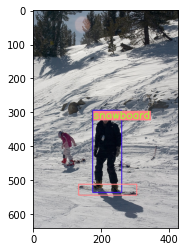

In [29]:
visualization(id=309, dataset_file='vcoco', path_id =1 , data_path='v-coco', threshold=0.4, topk=10,aug_path='[\'p2\',\'p3\',\'p4\']')  

loading annotations into memory...
Done (t=3.64s)
creating index...
index created!

[Logger] DETR Arguments:
	lr: 0.0001
	lr_backbone: 1e-05
	lr_drop: 80
	frozen_weights: None
	backbone: resnet50
	dilation: False
	position_embedding: sine
	enc_layers: 6
	dec_layers: 6
	num_queries: 100
	dataset_file: vcoco

[Logger] Number of params:  52413912


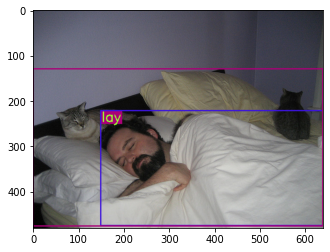

In [36]:
visualization(id=102, dataset_file='vcoco', path_id =1 , data_path='v-coco', threshold=0.4, topk=10,aug_path='[\'p2\',\'p3\',\'p4\']')  

In [23]:
if not os.path.exists('./vid/'):
    os.makedirs('./vid/')
!wget -nc "https://drive.google.com/uc?id=1JoO08dgvQ-tCP-OxDbTDUH1e83MkkF3Z" -O ./vid/tri_cut.mp4
!wget -nc 'https://docs.google.com/uc?id=1lioj-AS9FVdwF6IjRPfKJcrjvZHasxJK' -O ./vid/snow_board.mp4
# https://drive.google.com/file/d/1lioj-AS9FVdwF6IjRPfKJcrjvZHasxJK/view?usp=sharing

File ‘./vid/tri_cut.mp4’ already there; not retrieving.
--2022-08-11 06:00:33--  https://docs.google.com/uc?id=1lioj-AS9FVdwF6IjRPfKJcrjvZHasxJK
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.102, 74.125.142.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vieauq2m8esdrn8qc1s2sssnjpggbki5/1660197600000/15666262252630419224/*/1lioj-AS9FVdwF6IjRPfKJcrjvZHasxJK?uuid=07eb101b-8914-4376-b7e4-7f417ea58fcd [following]
--2022-08-11 06:00:33--  https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vieauq2m8esdrn8qc1s2sssnjpggbki5/1660197600000/15666262252630419224/*/1lioj-AS9FVdwF6IjRPfKJcrjvZHasxJK?uuid=07eb101b-8914-4376-b7e4-7f417ea58fcd
Resolving doc-04-2k-docs.googleusercontent.com (doc-04-2k-docs.googleusercontent.com)... 74.125.1

In [18]:
visualization(id='tri_cut',video_vis=True,path_id =0,dataset_file='vcoco',data_path='v-coco', threshold=0.4, topk=10)


loading annotations into memory...
Done (t=1.86s)
creating index...
index created!

[Logger] DETR Arguments:
	lr: 0.0001
	lr_backbone: 1e-05
	lr_drop: 80
	frozen_weights: None
	backbone: resnet50
	dilation: False
	position_embedding: sine
	enc_layers: 6
	dec_layers: 6
	num_queries: 100
	dataset_file: vcoco

[Logger] Number of params:  52413912
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 2.0 task/s, elapsed: 29s, ETA:     0s


In [30]:
visualization(id='snow_board',video_vis=True,path_id =0,dataset_file='vcoco',data_path='v-coco', threshold=0.4, topk=10)

loading annotations into memory...
Done (t=1.76s)
creating index...
index created!

[Logger] DETR Arguments:
	lr: 0.0001
	lr_backbone: 1e-05
	lr_drop: 80
	frozen_weights: None
	backbone: resnet50
	dilation: False
	position_embedding: sine
	enc_layers: 6
	dec_layers: 6
	num_queries: 100
	dataset_file: vcoco

[Logger] Number of params:  51181950
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 289/289, 2.9 task/s, elapsed: 99s, ETA:     0s


### GIF format

In [31]:
import imageio
file_name='snow_board_vis.mp4'
fps=(mmcv.VideoReader('./vid/'+file_name)).fps
cap = cv2.VideoCapture('./vid/'+file_name)
image_lst = []
 
while True:
    ret, frame = cap.read()
    if frame is None: 
      break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_lst.append(frame_rgb)
    
    # cv2.imshow('a', frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
 
# Convert to gif using the imageio.mimsave method
imageio.mimsave('./vid/snow_board_vis.gif', image_lst, fps=fps)


In [32]:
from IPython import display
gifPath = Path('./vid/snow_board_vis.gif') # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')